In [1]:
%matplotlib inline

In [2]:
import pystan

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=2)

In [4]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [5]:
print(fit)

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.84    0.33   4.99  -2.28   4.56   7.68  10.94  18.53  228.0    1.0
tau        6.51    0.37   5.27   0.25   2.68   5.24   9.06  20.74  205.0   1.01
eta[0]     0.38    0.06   0.93  -1.45  -0.21   0.43   1.03   2.05  278.0    1.0
eta[1]    -0.01    0.05   0.85  -1.71  -0.56  -0.02   0.54   1.66  280.0    1.0
eta[2]    -0.25    0.06   0.97   -2.1  -0.92  -0.26   0.37   1.69  296.0    1.0
eta[3]  -7.8e-3    0.06   0.95  -1.88  -0.67 8.5e-3   0.63   1.86  266.0    1.0
eta[4]    -0.36    0.05   0.84  -2.04  -0.91  -0.36   0.16   1.39  290.0    1.0
eta[5]    -0.19    0.05   0.86  -1.89  -0.79  -0.21   0.35   1.55  252.0    1.0
eta[6]      0.4    0.06   0.93   -1.4  -0.25    0.4   1.03   2.21  268.0    1.0
eta[7]     0.

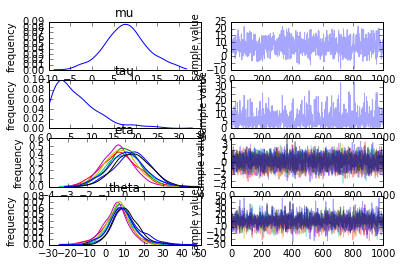

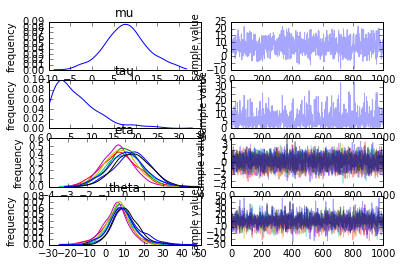

In [6]:
fit.plot()